# Definiciones y cháchara

In [ ]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

lin = True

In [ ]:
x = sp.Symbol('x')
y = sp.Symbol('y')
z = sp.Symbol('z')
t = sp.Symbol('t')

def RK4(t0,tf,h,x0,y0,xp,yp):
  ux = x0
  uy = y0
  k = tf/h
  lx = [x0]
  ly = [y0]
  
  for i in np.arange(t0+h,tf,h):
    L1 = xp.subs({t:i-h, x:ux, y:uy})
    M1 = yp.subs({t:i-h, x:ux, y:uy})

    L2 = xp.subs({t:(i-h)+h/2, x:ux+h*L1/2, y:uy+h*M1/2})
    M2 = yp.subs({t:(i-h)+h/2, x:ux+h*L1/2, y:uy+h*M1/2})

    L3 = xp.subs({t:(i-h)+h/2, x:ux+h*L2/2, y:uy+h*M2/2})
    M3 = yp.subs({t:(i-h)+h/2, x:ux+h*L2/2, y:uy+h*M2/2})

    L4 = xp.subs({t:(i-h)+h, x:ux+h*L3, y:uy+h*M3})
    M4 = yp.subs({t:(i-h)+h, x:ux+h*L3, y:uy+h*M3})

    ux = ux + h*(L1+2*L2+2*L3+L4)/6
    uy = uy + h*(M1+2*M2+2*M3+M4)/6

    lx.append(ux)
    ly.append(uy)

  return lx, ly


def RK43(t0,tf,h,x0,y0,z0,xp,yp,zp):
  ux = x0
  uy = y0
  uz = z0
  k = tf/h
  lx = [x0]
  ly = [y0]
  lz = [z0]
  
  for i in np.arange(t0+h,tf,h):
    L1 = xp.subs({t:i-h, x:ux, y:uy, z:uz})
    M1 = yp.subs({t:i-h, x:ux, y:uy, z:uz})
    N1 = zp.subs({t:i-h, x:ux, y:uy, z:uz})

    L2 = xp.subs({t:(i-h)+h/2, x:ux+h*L1/2, y:uy+h*M1/2, z:uz+h*N1/2})
    M2 = yp.subs({t:(i-h)+h/2, x:ux+h*L1/2, y:uy+h*M1/2, z:uz+h*N1/2})
    N2 = zp.subs({t:(i-h)+h/2, x:ux+h*L1/2, y:uy+h*M1/2, z:uz+h*N1/2})

    L3 = xp.subs({t:(i-h)+h/2, x:ux+h*L2/2, y:uy+h*M2/2, z:uz+h*N2/2})
    M3 = yp.subs({t:(i-h)+h/2, x:ux+h*L2/2, y:uy+h*M2/2, z:uz+h*N2/2})
    N3 = zp.subs({t:(i-h)+h/2, x:ux+h*L2/2, y:uy+h*M2/2, z:uz+h*N2/2})

    L4 = xp.subs({t:(i-h)+h, x:ux+h*L3, y:uy+h*M3, z:uz+h*N3})
    M4 = yp.subs({t:(i-h)+h, x:ux+h*L3, y:uy+h*M3, z:uz+h*N3})
    N4 = zp.subs({t:(i-h)+h, x:ux+h*L3, y:uy+h*M3, z:uz+h*N3})

    ux = ux + h*(L1+2*L2+2*L3+L4)/6
    uy = uy + h*(M1+2*M2+2*M3+M4)/6
    uz = uz + h*(N1+2*N2+2*N3+N4)/6

    lx.append(ux)
    ly.append(uy)
    lz.append(uz)

  return lx, ly, lz

# Comienza acá

## Input

In [ ]:


# Input de las ecuaciones
xp_str = input("Ecuación 1 a aproximar: ")
xp_str.strip()
yp_str = input("Ecuación 2 a aproximar: ")
yp_str.strip()

# Condiciones
t0 = input("Tiempo inicial: ")
t = input("Tiempo de simulación: ")
h = input("Intervalo de simulación: ")
x0 = input("x0: ")
y0 = input("y0: ")
k = t/h

# Paso a Sympy
xp = sp.sympify(xp_str)
yp = sp.sympify(yp_str)

## Funciones a lo bestia

In [ ]:
# Ejemplo 1
xp = sp.sympify('x*(-1+(2.5*x)-(0.3*y)-(x^2))')
yp = sp.sympify('y*(-1.5+x)')

x0 = 1
y0 = 1

lin = True

In [ ]:
# Ejemplo 2 - Lotka–Volterra/predador-presa
xp = sp.sympify('x*(1-y/2)')
yp = sp.sympify('y*(-1+x/3)')

x0 = 0.2
y0 = 0.4

lin = True

In [ ]:
# Ejemplo 3
xp = sp.sympify('x*(1-x/5-0.5*y)')
yp = sp.sympify('y*(-0.75+0.25*x)')

x0 = 1
y0 = 1

lin = True

In [ ]:
# Lidocaína, JM Cushing
xp = sp.sympify('-0.09*x+0.038*y')
yp = sp.sympify('0.066*x-0.038*y')

x0 = 0
y0 = 0.01

lin = False

In [ ]:
# Reacción
xp = sp.sympify('2-x-((4*x*y)/(1+x^2))')
yp = sp.sympify('5*x*(1-((y)/(1+x^2)))')

x0 = 0.1
y0 = 0.1

lin = False

In [ ]:
# RK43 Biomasa
xp = sp.sympify('-x+3*y')
yp = sp.sympify('-3*y+5*z')
zp = sp.sympify('-5*z')

x0 = 0.1
y0 = 0.1
z0 = 1

lin = False

In [ ]:
# Atractor de Thomas
xp = sp.sympify('sin(y)-0.18*x') # Parámetro b
yp = sp.sympify('sin(z)-0.18*y')
zp = sp.sympify('sin(x)-0.18*z')


x0 = 1
y0 = 0
z0 = 1

## Linealización

In [ ]:
# Linealización alrededor de punto no adherido
if lin == True:
  chk = 1
  sols  = list(sp.nonlinsolve([xp,yp], x, y))

  for i in sols:
    if 0 not in i:
      peq_na = [x for x in i]
    else:
      chk = 0

  if chk == 0:    
    sols  = list(sp.solve([xp,yp], [x, y]))
    for i in sols:
      if 0 not in i:
        peq_na = [x for x in i]


  A_lst = [[sp.diff(xp,x),sp.diff(xp,y)],[sp.diff(yp,x),sp.diff(yp,y)]]


  A_ev = [i.subs({x:peq_na[0], y:peq_na[1]}) for subl in A_lst for i in subl]
  A_ev_m = np.reshape(A_ev, (2,2))

  xlin = sp.sympify(str(A_ev[0])+"*(x-"+str(peq_na[0])+")+("+str(A_ev[1])+"*(y-"+str(peq_na[1])+"))")
  ylin = sp.sympify(str(A_ev[2])+"*(x-"+str(peq_na[0])+")+("+str(A_ev[3])+"*(y-"+str(peq_na[1])+"))")

## Condiciones a lo bestia

In [ ]:
# Condiciones de tiempo
t0 = 0
tf = 3
h = 0.5

## Cálculo importante

In [ ]:
reso = RK4(t0,tf,h,x0,y0,xp,yp)
lxo = reso[0]
lyo = reso[1]

if lin == True:
  resl = RK4(t0,tf,h,x0,y0,xlin,ylin)
  lxl = resl[0]
  lyl = resl[1]

In [ ]:
reso = RK43(t0,tf,h,x0,y0,z0,xp,yp,zp)
lxo = reso[0]
lyo = reso[1]
lzo = reso[2]

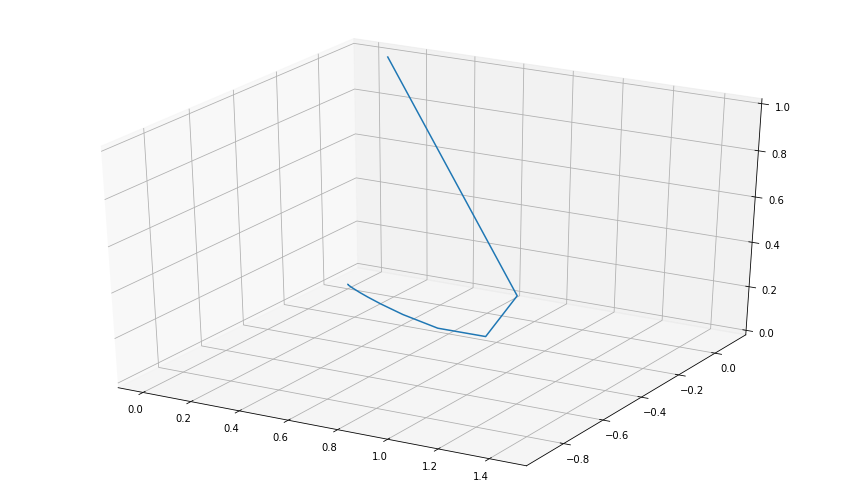

In [ ]:
fig = plt.figure(figsize=(15,9))
fig.add_subplot(111, projection='3d')
plt.plot(lxo,lyo,lzo)

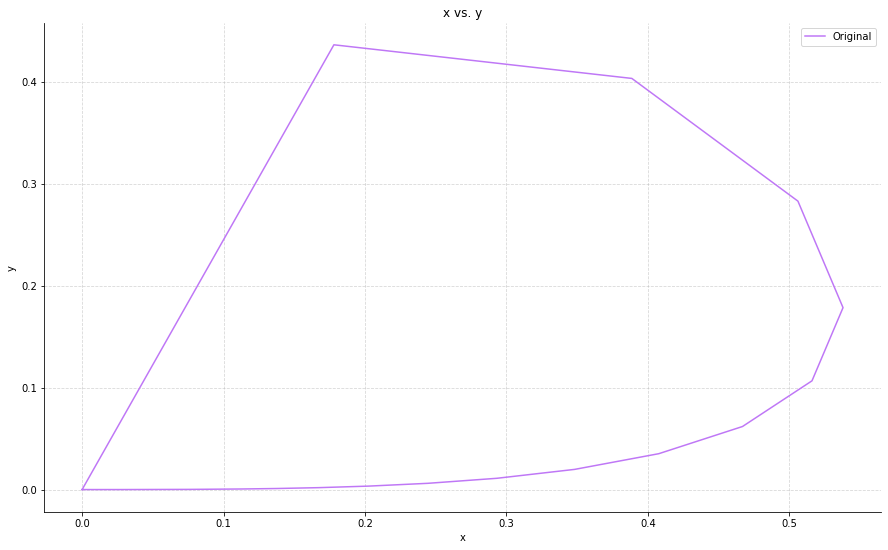

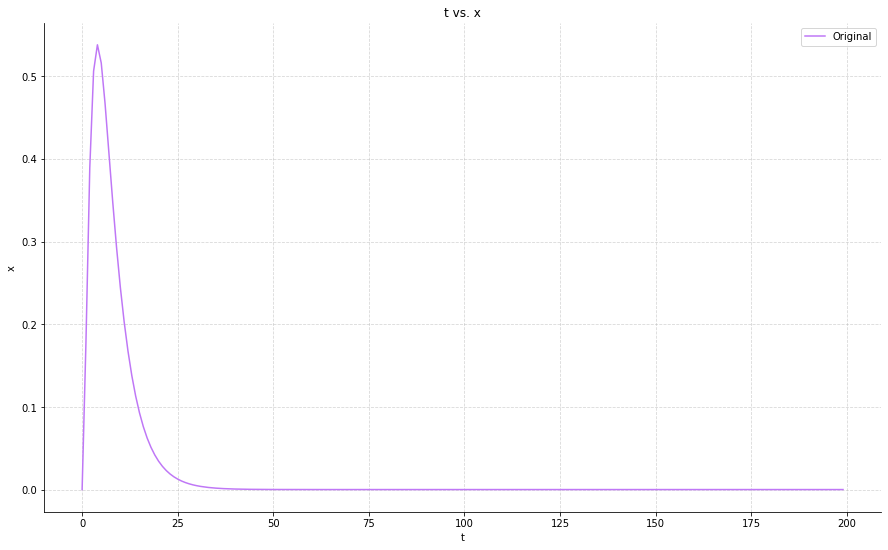

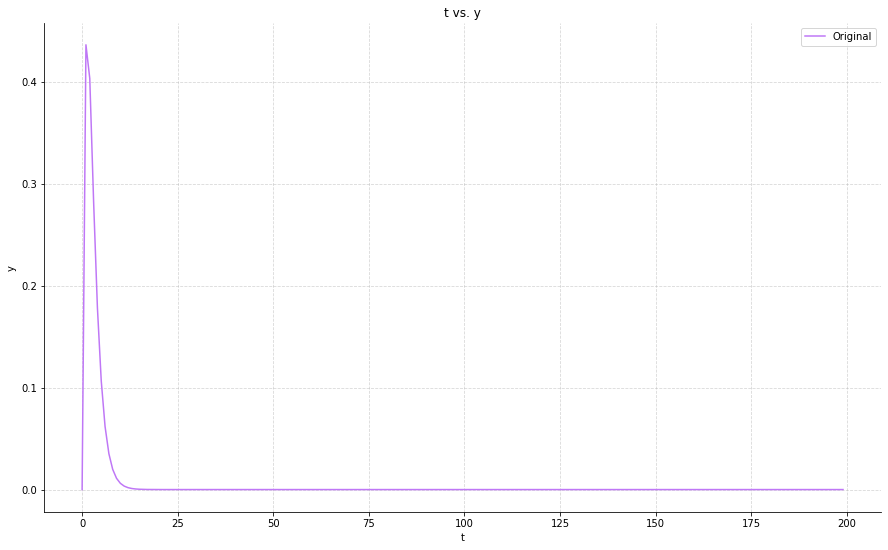

In [ ]:
plt.figure(figsize=(15,9))
plt.plot(lxo,lyo, color='xkcd:light purple', label='Original')
if lin == True : plt.plot(lxl,lyl, color='xkcd:aquamarine', label='Lineal')
plt.grid(alpha = 0.5, linestyle='--')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title("x vs. y")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

plt.figure(figsize=(15,9))
plt.plot(range(len(lxo)),lxo, color='xkcd:light purple', label='Original')
if lin == True : plt.plot(range(len(lxl)),lxl, color='xkcd:aquamarine', label='Lineal')
plt.grid(alpha = 0.5, linestyle='--')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title("t vs. x")
plt.xlabel("t")
plt.ylabel("x")
plt.legend()
plt.show()

plt.figure(figsize=(15,9))
plt.plot(range(len(lyo)),lyo, color='xkcd:light purple', label='Original')
if lin == True : plt.plot(range(len(lyl)),lyl, color='xkcd:aquamarine', label='Lineal')
plt.grid(alpha = 0.5, linestyle='--')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title("t vs. y")
plt.xlabel("t")
plt.ylabel("y")
plt.legend()
plt.show()